In [220]:
# ПРЕДОБРАБОТКА: ТОКИНЕНИЗАЦИЯ, ЛЕММАТИЗАЦИЯ
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [221]:
import numpy as np
import pandas as pd
import re
import nltk
#import spacy
import string


In [222]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [223]:
##Чтение датасета с текстом
df = pd.read_csv("/content/drive/MyDrive/Celebrityforum dataset - 1.csv", encoding='utf-8', sep=",")
df.head()


,№,Предложение
0,1,Последнее время пребываю в подавленном эмоцион...
1,2,"Сама по себе позитивный человек, люблю улыбать..."
2,3,"Но сейчас - ничего не хочется, ощущение полной..."
3,4,Мне 25 лет.
4,5,За это время не было даже поцелуя с мужчиной.


In [224]:
#help(pd.read_csv)

In [225]:
!pip install pymorphy2

ERROR: Operation cancelled by user


In [226]:
from nltk.corpus import stopwords
with open("/content/drive/MyDrive/stopwords.txt", 'r', encoding="utf8") as f:
    STOPWORDS = f.read().splitlines()
# функция, удаляющая стопслова из текстов
def stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
# Удаление эмодзи
def emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


In [227]:
#Удаление URL
# Function for url's
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
from bs4 import BeautifulSoup
#Function for removing html
def html(text):
    return BeautifulSoup(text, "lxml").text


In [228]:
#Можно выполнить при помощи NLTK. Заодно проведем лемматизацию
from pymorphy2 import MorphAnalyzer
from nltk import sent_tokenize, word_tokenize, regexp_tokenize

In [229]:
def tokenize_lemmas(sent, pat=r"(?u)\b\w\w+\b", morph=MorphAnalyzer()):
    return [morph.parse(tok)[0].normal_form
            for tok in regexp_tokenize(sent, pat)]


In [230]:
df['Предложение_готовые']  = df['Предложение'].str.lower()
df['Предложение_готовые'] = df['Предложение_готовые'].str.replace('\d+', '')
df['Предложение_готовые'] = df['Предложение_готовые'].str.replace('[^\w\s]','')
df["Предложение_готовые"] = df["Предложение_готовые"].apply(stopwords)
df['Предложение_готовые'] = df['Предложение_готовые'].apply(emoji)
df['Предложение_готовые'] = df['Предложение_готовые'].apply(remove_urls)
df['Предложение_готовые'] = df['Предложение_готовые'].apply(html)
df["Предложение_готовые"] = df["Предложение_готовые"].map(lambda x: " ".join(tokenize_lemmas(x)))
df[['Предложение_готовые']].head()


,Предложение_готовые
0,последний пребывать подавить эмоциональный сос...
1,позитивный человек любить улыбаться шутить
2,хотеться ощущение полный пустота жизнь
3,25 год
4,поцелуй мужчина


In [78]:
import pandas as pd

In [231]:
#df.drop(columns =['№','Предложение'],inplace=True)

In [ ]:
#df.to_csv('Ready9_Celebrity.csv')
#так называется мой датасет после предобработки,
#в нем только колонка с нумерацией начинающаяся с 0 и  Предложение_готовые

In [232]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence


In [79]:
#help(Word2Vec) --модели на основе искусственных нейросетей, предназначенные для получения векторных представлений слов.
#используются для анализа семантики естеств.яз.
#w2v принимает текстовый корпус в качестве входных данных и сопоставляет каждому слову вектор,выдавая координаты на выходе
#сначала генерирует словарь, затем вычисляет векторное представление слов, "обучаясь" на входных данных
#векторное представление основывается на контекстной близости слов.

In [233]:
w2v_model = Word2Vec(
    min_count=10,
    window=2,
    vector_size=300,
    negative=5,
    alpha=0.03,
    min_alpha=0.0007,
    sample=6e-5,
    sg=1)


In [ ]:
#WORD EMBEDDING -В обработке естественного языка (NLP) встраивание слов - это представление слова.
#Встраивание используется при анализе текста. Обычно представление представляет собой вещественный вектор,
#который кодирует значение слова таким образом, что ожидается, что слова,
#расположенные ближе в векторном пространстве, будут схожи по значению.

In [ ]:
#min_count — минимальное число вхождений слова
#window — расстояние между current и predicted слов
#vector_size — размер векторного представления слова (word embedding) — размер матрицы
#negative — сколько неконтекстных слов учитывать в обучении, используя negative sampling — число слов
#alpha — начальный learning_rate, используемый в алгоритме обратного распространения ошибки (Backpropogation).Задаем угол наклон распределения
#min_alpha — минимальное значение learning_rate, на которое может опуститься в процессе обучения.
#sg — если 1, то используется реализация Skip-gram; если 0, то CBOW.В Skip -Gram, мы пытаемся предсказать контекстные слова, используя главное слово.
#CBOW - Исходя из контекстных слов, мы хотим, чтобы наша модель предсказывала главное слово:



In [234]:
#Получаем лист слов
from nltk.tokenize import sent_tokenize
from gensim.utils import simple_preprocess

In [235]:
class MySentences(object):
    def __init__(self, docs):
        self.corpus = docs
    def __iter__(self):
        for doc in self.corpus:
            doc_sentences = sent_tokenize(doc)
            for sent in doc_sentences:
                yield simple_preprocess(sent) # yields a tokenized


In [236]:
sentences = MySentences(df['Предложение_готовые'].tolist()) #преобразование столбца в список

In [237]:
#Получаем словарь
w2v_model.build_vocab(sentences)


In [238]:
new_var = w2v_model.corpus_total_words
new_var

55813

In [239]:
#Обучение
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=6, report_delay=1)
#(trained_word_count, raw_word_count) - (количество обученных слов, количество необработанных слов)т.е кол-ва слов умноженное на кол-во эпох


(65131, 334878)

In [240]:
#для сохранения оперативной памяти можно написать следующее
w2v_model.init_sims(replace=True)


<ipython-input-240-ccdb4c4f0af4>:2: DeprecationWarning:

Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).



In [27]:
# СИНОНИМИЧЕСКАЯ БЛИЗОСТЬ
w2v_model.wv.most_similar(positive=["эмоциональный"], topn=10)


[('бросить', 0.24781173467636108),
 ('захотеть', 0.20289301872253418),
 ('творческий', 0.20067644119262695),
 ('попробовать', 0.19729971885681152),
 ('женщина', 0.1965647041797638),
 ('сольный', 0.176364004611969),
 ('instagram', 0.17032741010189056),
 ('рассказывать', 0.16925111413002014),
 ('помнить', 0.16612683236598969),
 ('какой', 0.16346947848796844)]

In [210]:
w2v_model.wv.most_similar(positive=["карьера"], topn=10)

[('бояться', 0.26468634605407715),
 ('прекрасный', 0.2560180425643921),
 ('свой', 0.24059829115867615),
 ('бросить', 0.231658935546875),
 ('мочь', 0.2297290712594986),
 ('понимать', 0.22589725255966187),
 ('точка', 0.22161731123924255),
 ('человек', 0.21918390691280365),
 ('за', 0.21577134728431702),
 ('из', 0.21490998566150665)]

In [28]:
w2v_model.wv.most_similar(positive=["приятный"], topn=10)

[('мочь', 0.2778606116771698),
 ('тренер', 0.2525835335254669),
 ('писать', 0.2522919178009033),
 ('узнать', 0.23565764725208282),
 ('мужчина', 0.2333105206489563),
 ('собственный', 0.2292366325855255),
 ('бы', 0.22461314499378204),
 ('день', 0.2207932323217392),
 ('любой', 0.22012938559055328),
 ('весь', 0.21527346968650818)]

In [209]:
w2v_model.wv.most_similar(positive=["семья", "муж"], topn=10)

[('человек', 0.29999998211860657),
 ('то', 0.29003775119781494),
 ('уровень', 0.28901249170303345),
 ('стать', 0.283975213766098),
 ('что', 0.2777222692966461),
 ('мой', 0.27622222900390625),
 ('проект', 0.2552357316017151),
 ('некоторый', 0.24953165650367737),
 ('решить', 0.24366244673728943),
 ('ради', 0.24329587817192078)]

In [211]:
w2v_model.wv.most_similar(positive=["семья"], topn=10)

[('вариант', 0.286112904548645),
 ('стать', 0.2727724015712738),
 ('то', 0.26444530487060547),
 ('общение', 0.26220861077308655),
 ('уровень', 0.25831323862075806),
 ('модель', 0.25002363324165344),
 ('сказать', 0.2444455623626709),
 ('шутить', 0.24270832538604736),
 ('проект', 0.24017202854156494),
 ('смотреть', 0.23924744129180908)]

In [ ]:
#Векторы можно складывать и вычитать

In [101]:
w2v_model.wv.most_similar(positive=["депрессия", "эмоциональный"], topn=10)

[('центр', 0.2211449295282364),
 ('помнить', 0.21647030115127563),
 ('живой', 0.19898268580436707),
 ('женщина', 0.19769546389579773),
 ('верить', 0.1962795853614807),
 ('творческий', 0.19382786750793457),
 ('малый', 0.1897416114807129),
 ('что', 0.18858733773231506),
 ('бросить', 0.1868896782398224),
 ('занятие', 0.18227440118789673)]

In [203]:
#определить наиболее близкое слово из списка к данному слово
w2v_model.wv.most_similar_to_given("хороший", ["человек", "город", "муж","работа"])

'человек'

In [202]:
w2v_model.wv.most_similar_to_given("эмоциональный", ["человек", "город", "спорт","муж"])

'муж'

In [200]:
w2v_model.wv.most_similar_to_given("муж", ["ненавидеть", "любить", "спорт"])

'любить'

In [207]:
w2v_model.wv.most_similar_to_given("карьера", ["работа", "последний","любить"])

'любить'

In [128]:
w2v_model.wv.most_similar_to_given("ощущение", ["жизнь", "депрессия", "первый"])

'жизнь'

In [208]:
w2v_model.wv.most_similar_to_given("семья", ["муж", "дочь", "мама","любить"])

'любить'

In [80]:
# TF-IDF - TF — term frequency, IDF — inverse document frequency) —
#статистическая мера, используемая для оценки важности слова в контексте документа,
#являющегося частью коллекции документов или корпуса.
#Вес некоторого слова пропорционален частоте употребления этого слова в документе и
#обратно пропорционален частоте употребления слова во всех документах коллекции.

#TF (term frequency — частота слова) — отношение числа вхождений некоторого слова к общему числу слов документа.
#Оценивается важность слова в пределах отдельного документа.

#IDF (inverse document frequency — обратная частота документа) — инверсия частоты,
#с которой некоторое слово встречается в документах коллекции.
#Основоположником данной концепции является Карен Спарк Джонс. Учёт IDF уменьшает вес широкоупотребительных слов.
#Для каждого уникального слова в пределах конкретной коллекции документов существует только одно значение IDF.

In [241]:
# TF-IDF (КЛЮЧЕВЫЕ СЛОВА)

from sklearn.feature_extraction.text import TfidfVectorizer

In [242]:
tfidf_vectorizer=TfidfVectorizer(use_idf=True)

In [243]:
texts = df.Предложение_готовые
texts

0       последний пребывать подавить эмоциональный сос...
1              позитивный человек любить улыбаться шутить
2                  хотеться ощущение полный пустота жизнь
3                                                  25 год
4                                         поцелуй мужчина
                              ...                        
9239                               тип опасный вредный тд
9240                                      попасть никогда
9241      представить сильно мечтать неосуществимый мечта
9242                                     избавиться мечта
9243                                    отказаться думать
Name: Предложение_готовые, Length: 9244, dtype: object

In [244]:
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(texts)

In [256]:
first_vector_tfidfvectorizer=tfidf_vectorizer_vectors[0]

In [257]:
df1 = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tfidf_vectorizer.get_feature_names_out(), columns=["tfidf"])
df1.sort_values(by=["tfidf"],ascending=False)[:10]


,tfidf
подавить,0.522470
пребывать,0.522470
эмоциональный,0.429382
состояние,0.378746
последний,0.355294
преподавать,0.000000
преподнести,0.000000
преподносить,0.000000
препятствие,0.000000
прерваться,0.000000


In [32]:
# packages to store and manipulate data
import numpy as np
import pandas as pd
# model building package
import sklearn

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
df = pd.read_csv("/content/drive/MyDrive/Ready9_Celebrity.csv", encoding='utf-8', sep=",")
df.head()

,Unnamed: 0,Предложение_готовые
0,0,последний пребывать подавить эмоциональный сос...
1,1,позитивный человек любить улыбаться шутить
2,2,хотеться ощущение полный пустота жизнь
3,3,25 год
4,4,поцелуй мужчина


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.95, min_df=2)

In [36]:
dtm = tfidf_vectorizer.fit_transform(df['Предложение_готовые'].values.astype('U'))

In [37]:
#dtm = cv.fit_transform(df['Предложение_готовые'])

In [38]:
from sklearn.decomposition import LatentDirichletAllocation


In [ ]:
#Линейный дискриминантный анализ (Linear Discriminant Analysis или LDA) — алгоритм классификации и понижения размерности,
#позволяющий производить разделение классов наилучшим образом.
#Основная идея LDA заключается в предположении о многомерном нормальном распределении признаков внутри классов и поиске их линейного преобразования,
#которое максимизирует межклассовую дисперсию и минимизирует внутриклассовую. Другими словами,
#объекты разных классов должны иметь нормальное распределение и располагаться как можно дальше друг от друга, а одного класса — как можно ближе.

In [58]:
LDA = LatentDirichletAllocation(n_components=7,random_state=42)

In [63]:
LDA.fit(dtm)
# get the components
components = LDA.components_

In [64]:
print(len(LDA.components_),type(LDA.components_))

7 <class 'numpy.ndarray'>


In [138]:
single_topic0 = LDA.components_[0]
single_topic1 = LDA.components_[1]#1 это номер топика их всего 7
single_topic2 = LDA.components_[2]
single_topic3 = LDA.components_[3]
single_topic4 = LDA.components_[4]
single_topic5 = LDA.components_[5]
single_topic6 = LDA.components_[6]

In [139]:
top_10_words0 = single_topic0.argsort()[-10:]
top_10_words1 = single_topic1.argsort()[-10:]
top_10_words2 = single_topic2.argsort()[-10:]
top_10_words3 = single_topic3.argsort()[-10:]
top_10_words4 = single_topic4.argsort()[-10:]
top_10_words5 = single_topic5.argsort()[-10:]
top_10_words6 = single_topic6.argsort()[-10:]

In [152]:
top_10_words = single_topic.argsort()[-20:] # Возвращает индексы, по которым можно было бы отсортировать этот массив.
words_LDA = [] #Получаем имена выходных объектов для преобразования. Показаны лучшие слова по теме
for index in top_10_words:
    print(tfidf_vectorizer.get_feature_names_out()[index])
    words_LDA.append(tfidf_vectorizer.get_feature_names_out()[index])

определённый
знать
хотеть
родитель
потому
заниматься
стать
жалеть
личный
момент
то
человек
любовь
счастливый
первый
важный
понять
самый
мой
любить


In [145]:
words_LDA0 = [] #Получаем имена выходных объектов для преобразования. Показаны лучшие слова по теме
for index in top_10_words0:
    print(tfidf_vectorizer.get_feature_names_out()[index])
    words_LDA.append(tfidf_vectorizer.get_feature_names_out()[index])


стараться
по
то
спорт
такой
настоящий
заниматься
большой
наверное
разный


In [146]:
words_LDA1 = [] #Получаем имена выходных объектов для преобразования.
for index in top_10_words1:
    print(tfidf_vectorizer.get_feature_names_out()[index])
    words_LDA.append(tfidf_vectorizer.get_feature_names_out()[index])

то
человек
любовь
счастливый
первый
важный
понять
самый
мой
любить


In [147]:
words_LDA2 = [] #Получаем имена выходных объектов для преобразования.
for index in top_10_words2:
    print(tfidf_vectorizer.get_feature_names_out()[index])
    words_LDA.append(tfidf_vectorizer.get_feature_names_out()[index])

любить
ощущение
ненавидеть
мочь
тот
человек
что
да
то
nan


In [148]:
words_LDA3 = [] #Получаем имена выходных объектов для преобразования.
for index in top_10_words3:
    print(tfidf_vectorizer.get_feature_names_out()[index])
    words_LDA.append(tfidf_vectorizer.get_feature_names_out()[index])

конечно
жизнь
дело
театр
знать
делать
нет
хотеться
думать
то


In [149]:
words_LDA4 = [] #Получаем имена выходных объектов для преобразования.
for index in top_10_words4:
    print(tfidf_vectorizer.get_feature_names_out()[index])
    words_LDA.append(tfidf_vectorizer.get_feature_names_out()[index])

ребёнок
какой
один
помогать
человек
говорить
семья
хотеть
друг
то


In [150]:
words_LDA5 = [] #Получаем имена выходных объектов для преобразования.
for index in top_10_words5:
    print(tfidf_vectorizer.get_feature_names_out()[index])
    words_LDA.append(tfidf_vectorizer.get_feature_names_out()[index])

жизнь
мама
хороший
какой
человек
знать
конечно
мой
то
понимать


In [151]:
words_LDA6 = [] #Получаем имена выходных объектов для преобразования.
for index in top_10_words6:
    print(tfidf_vectorizer.get_feature_names_out()[index])
    words_LDA.append(tfidf_vectorizer.get_feature_names_out()[index])

искусство
ужасно
бог
готовый
помнить
человек
помочь
другой
бояться
женщина


In [153]:
#print(words_LDA)
str_words_LDA = " ".join(words_LDA)
print(str_words_LDA)


определённый знать хотеть родитель потому заниматься стать жалеть личный момент то человек любовь счастливый первый важный понять самый мой любить


In [70]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
wordcloud = WordCloud(background_color='white').generate(str_words_LDA)

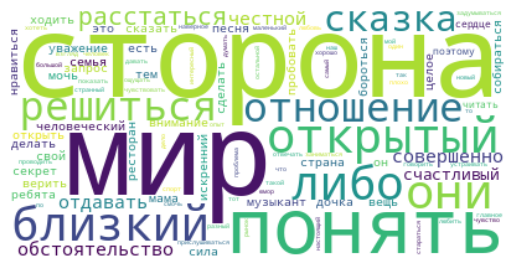

In [72]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [154]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')


THE TOP 15 WORDS FOR TOPIC #0
['стараться', 'по', 'то', 'спорт', 'такой', 'настоящий', 'заниматься', 'большой', 'наверное', 'разный']


THE TOP 15 WORDS FOR TOPIC #1
['то', 'человек', 'любовь', 'счастливый', 'первый', 'важный', 'понять', 'самый', 'мой', 'любить']


THE TOP 15 WORDS FOR TOPIC #2
['любить', 'ощущение', 'ненавидеть', 'мочь', 'тот', 'человек', 'что', 'да', 'то', 'nan']


THE TOP 15 WORDS FOR TOPIC #3
['конечно', 'жизнь', 'дело', 'театр', 'знать', 'делать', 'нет', 'хотеться', 'думать', 'то']


THE TOP 15 WORDS FOR TOPIC #4
['ребёнок', 'какой', 'один', 'помогать', 'человек', 'говорить', 'семья', 'хотеть', 'друг', 'то']


THE TOP 15 WORDS FOR TOPIC #5
['жизнь', 'мама', 'хороший', 'какой', 'человек', 'знать', 'конечно', 'мой', 'то', 'понимать']


THE TOP 15 WORDS FOR TOPIC #6
['искусство', 'ужасно', 'бог', 'готовый', 'помнить', 'человек', 'помочь', 'другой', 'бояться', 'женщина']




Bert Topic — это метод моделирования тем, который использует модели Bert для анализа и группировки документов на основе их семантической близости.
Он использует алгоритмы машинного обучения для встраивания документов, а затем находит закономерности и кластеры в корпусе.

Преимущества Bert Topic:
Автоматическое определение количества тем. В отличие от традиционных методов моделирования тем,
Bert Topic может автоматически определять количество тем и генерировать значимые кластеры без необходимости ручной спецификации.
Улучшенная точность кластеризации.

Глубокие семантические представления, полученные с помощью Bert Topic, позволяют более точно группировать документы,
учитывая тонкие сходства и закономерности.

Отсутствие необходимости в предварительной обработке.
Bert Topic может эффективно работать с шумом и не требует удаления стоп-слов или других шагов предварительной обработки,
что делает его более эффективным и гибким.

In [77]:
#bertopic

!pip install BERTopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 24.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 22.9 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (7

In [156]:
!pip install bertopic
!pip install --upgrade joblib==1.1.0 # HDBScan fails to load with joblib==1.2.0
!pip install --upgrade git+https://github.com/scikit-learn-contrib/hdbscan.git#egg=hdbscan

  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully uninstalled joblib-1.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.10.1 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.
scikit-learn 1.2.2 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.


  Cloning https://github.com/scikit-learn-contrib/hdbscan.git to /tmp/pip-install-kldqhti1/hdbscan_07e6ac5096c047d9993a8da64f496e35
  Running command git clone --filter=blob:none --quiet https://github.com/scikit-learn-contrib/hdbscan.git /tmp/pip-install-kldqhti1/hdbscan_07e6ac5096c047d9993a8da64f496e35
  Resolved https://github.com/scikit-learn-contrib/hdbscan.git to commit fc94241a4ecf5d3668cbe33b36ef03e6160d7ab7
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [157]:
import os
import pandas as pd
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from umap import UMAP # In case we want to make results deterministic and reproducible

In [158]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [159]:
with open("/content/drive/MyDrive/stopwords.txt", 'r', encoding="utf8") as f:
    stop = f.read().splitlines()

In [160]:
vectorizer_model = CountVectorizer(ngram_range=(1, 1), stop_words=frozenset(stop))

In [161]:
# Prepare data
df = pd.read_csv('/content/drive/MyDrive/Celebrityforum dataset - 1.csv', encoding="utf-8")
docs = df['Предложение'].values.tolist()

In [163]:
df.tail()

,№,Предложение
9239,9240,"Типа, это же опасная и очень вредная работа и ..."
9240,9241,И я не попаду туда никогда...
9241,9242,"Представьте, что вы о чем то сильно мечтаете, ..."
9242,9243,Как избавиться от мечты?
9243,9244,Как отказаться от нее и не думать...


In [164]:
from bertopic import BERTopic
import pandas as pd
import nltk
nltk.download('stopwords')
#from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [166]:
docs

['Последнее время пребываю в подавленном эмоциональном состоянии.',
 'Сама по себе позитивный человек, люблю улыбаться, шутить.',
 'Но сейчас - ничего не хочется, ощущение полной пустоты жизни.',
 'Мне 25 лет.',
 'За это время не было даже поцелуя с мужчиной.',
 'Я внешне вроде бы не уродина, правда есть такая плохая особенность у меня -я вся мелкая и миниатюрная (рост 157), маленькая грудь, маленькая талия, из-за этого выгляжу как ребёнок, хотя одеждой всячески пытаюсь это скрыть.',
 'Думаю, это отпугивает от меня взрослых мужчин.',
 'За все время, в жизни со мной никто не пытался никогда познакомиться, молчу уже про что-то более серьёзное.',
 'Даже во время общения вижу от мужчины посыл «ты мне приятна как человек, но я с тобой не как с девушкой».',
 'Я понимаю, что сейчас время инстаграммных красоток, что вокруг полно очень красивых девушек, я на их фоне проигрываю.',
 'Мечтаю давно о пластике.',
 'Но просто иногда как нахлынет, ну почему так?',
 'Почему не суждено мне...',
 'Просто

In [167]:
from nltk.corpus import stopwords

In [168]:
# Remove stopwords **after** generating the clusters
# NOTE: You can also perform the lemmatization here
my_stopwords = stopwords.words("russian")
vectorizer_model = CountVectorizer(stop_words=my_stopwords)

#from hdbscan import HDBSCAN
documents = df['Предложение'][1:10000].values.tolist()
umap_model = UMAP(n_neighbors=50, n_components=20,
                  min_dist=0.0, metric='cosine', random_state=13)


In [169]:
# Load KBLab's Swedish sentence transformer model
sentence_model = SentenceTransformer("paraphrase-multilingual-mpnet-base-v2", device="cuda")


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/402 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [170]:
# Initialize BERTopic with the settings we want
topic_model = BERTopic(embedding_model=sentence_model,
                       vectorizer_model=vectorizer_model,
                       umap_model=umap_model,
                       calculate_probabilities=True,
                       verbose=True)


In [171]:
# Fit the model
topics, probs = topic_model.fit_transform(documents)

2024-05-13 15:54:27,918 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/289 [00:00<?, ?it/s]

2024-05-13 15:54:43,733 - BERTopic - Embedding - Completed ✓
2024-05-13 15:54:43,735 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-05-13 15:56:10,966 - BERTopic - Dimensionality - Completed ✓
2024-05-13 15:56:10,969 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-05-13 15:56:14,942 - BERTopic - Cluster - Completed ✓
2024-05-13 15:56:14,953 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-05-13 15:56:15,179 - BERTopic - Representation - Completed ✓


In [172]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,4853,-1_это_очень_просто_время,"[это, очень, просто, время, жизни, люди, котор...",[Не знаю почему на свою сестру я тоже ненавижу...
1,0,424,0_мужчина_муж_говорит_любит,"[мужчина, муж, говорит, любит, нему, человек, ...","[Говорит, что дело не во мне, а в нем, Нет, эт..."
2,1,317,1_музыку_музыка_песни_рэп,"[музыку, музыка, песни, рэп, альбом, музыкой, ...",[Мне больше всего нравилось заниматься музыкой...
3,2,264,2_кино_фильм_фильмы_роль,"[кино, фильм, фильмы, роль, сезон, театр, теат...","[Я реже, чем хотелось бы смотрю кино, Если мне..."
4,3,224,3_спорт_спортом_спорта_катание,"[спорт, спортом, спорта, катание, фигурное, ми...","[Если бы не спорт, не знаю, кем бы я стал, Я у..."
...,...,...,...,...,...
79,78,12,78_инвалидностью_инвалидами_ограниченными_пока...,"[инвалидностью, инвалидами, ограниченными, пок...","[Мне кажется, людям, которые стали инвалидами ..."
80,79,11,79_полотенца_протираю_мою_пылесошу,"[полотенца, протираю, мою, пылесошу, глажу, пы...","[Но, помимо этого, пылесошу раза два-три в нед..."
81,80,11,80_почему_why_бессмысленная_наладить,"[почему, why, бессмысленная, наладить, затея, ...","[Почему нет?, Почему бы и нет?, Почему? Потому..."
82,81,10,81_выпячивала_хамства_распускаю_разрушаю,"[выпячивала, хамства, распускаю, разрушаю, при...","[Я никогда не выпячивала свои достоинства, но ..."


In [173]:
topic_model.get_topic(1)

[('музыку', 0.027310135989489736),
 ('музыка', 0.024463326044948636),
 ('песни', 0.024222215125270063),
 ('рэп', 0.02155070638139612),
 ('альбом', 0.020113992622636377),
 ('музыкой', 0.019608859226335734),
 ('петь', 0.019277496949340982),
 ('музыки', 0.019009820812629134),
 ('концерт', 0.0177945345464562),
 ('музыке', 0.016049649611558355)]

In [175]:
topic_model.get_representative_docs(1)

['Мне больше всего нравилось заниматься музыкой, уже тогда сочиняла свои первые песни',
 'Очень мало слушаю рэп-музыки',
 'Это любовь и, конечно же, музыка']

In [178]:
topic_model.get_topic(3) # topic_model.get_topic(similar_topics[0])


[('спорт', 0.0375526524789197),
 ('спортом', 0.03146113789981833),
 ('спорта', 0.027277476851679146),
 ('катание', 0.0186752195749663),
 ('фигурное', 0.0186752195749663),
 ('мира', 0.016379696421432496),
 ('bmx', 0.016340817128095514),
 ('тренировки', 0.015957875327658952),
 ('спортсмен', 0.015273056668934767),
 ('игры', 0.015006709835615162)]

In [180]:
topic_model.get_representative_docs(3) #выводит пример из датасета по этому топику

['Если бы не спорт, не знаю, кем бы я стал',
 'Я уже много лет занимаюсь спортом',
 'Спорт я очень люблю!']

In [181]:
topic_model.visualize_topics()

In [182]:
fig = topic_model.visualize_topics()
fig.write_html("/content/Celebrityforum datases_topics.html")


In [183]:
fig2 = topic_model.visualize_hierarchy()
fig2.write_html("/content/Celebrityforum dataset_hierarchy.html")


In [184]:
hierarchical_topics = topic_model.hierarchical_topics(documents)
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)


100%|██████████| 82/82 [00:00<00:00, 281.96it/s]


In [190]:
fig3 = topic_model.visualize_barchart(width=280, height=330,top_n_topics=10, n_words=20)
fig3.write_html("/content/Celebrityforum dataset_barchart.html")

In [186]:
topic_model.visualize_barchart(width=280, height=330,top_n_topics=10, n_words=20)

Генеративная модель — это модель машинного обучения, которая имеет способность генерировать новые данные, соответствующие распределению исходных данных.

In [191]:
#генеративные модели

import pandas as pd
import chardet

data =  pd.read_csv("/content/drive/MyDrive/Celebrityforum dataset - 1.csv", encoding='UTF8', sep=",")
data.head()

,№,Предложение
0,1,Последнее время пребываю в подавленном эмоцион...
1,2,"Сама по себе позитивный человек, люблю улыбать..."
2,3,"Но сейчас - ничего не хочется, ощущение полной..."
3,4,Мне 25 лет.
4,5,За это время не было даже поцелуя с мужчиной.


In [192]:
!pip3 install urllib3==1.25.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.5/125.5 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7


In [ ]:
!wget https://raw.githubusercontent.com/sberbank-ai/ru-gpts/master/pretrain_transformers.py

--2024-05-05 14:59:28--  https://raw.githubusercontent.com/sberbank-ai/ru-gpts/master/pretrain_transformers.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34150 (33K) [text/plain]
Saving to: ‘pretrain_transformers.py’

pretrain_transforme 100%[===================>]  33.35K  --.-KB/s    in 0.01s   

2024-05-05 14:59:29 (2.59 MB/s) - ‘pretrain_transformers.py’ saved [34150/34150]



In [ ]:
!wget https://raw.githubusercontent.com/sberbank-ai/ru-gpts/master/generate_transformers.py

--2024-05-05 14:59:32--  https://raw.githubusercontent.com/sberbank-ai/ru-gpts/master/generate_transformers.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10474 (10K) [text/plain]
Saving to: ‘generate_transformers.py’

generate_transforme 100%[===================>]  10.23K  --.-KB/s    in 0.001s  

2024-05-05 14:59:33 (9.95 MB/s) - ‘generate_transformers.py’ saved [10474/10474]



In [ ]:
%%writefile setup.sh
git clone https://github.com/NVIDIA/apex

cd apex
# if pip >= 23.1 (ref: https://pip.pypa.io/en/stable/news/#v23-1) which supports multiple `--config-settings` with the same key...
pip install -v --disable-pip-version-check --no-cache-dir --no-build-isolation --config-settings "--build-option=--cpp_ext" --config-settings "--build-option=--cuda_ext" ./
# otherwise
pip install -v --disable-pip-version-check --no-cache-dir --no-build-isolation --global-option="--cpp_ext" --global-option="--cuda_ext" ./


Overwriting setup.sh


In [ ]:
!sh setup.sh

fatal: destination path 'apex' already exists and is not an empty directory.
Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Processing /content/apex
  Running command Preparing metadata (pyproject.toml)


  torch.__version__  = 2.2.1+cu121


  running dist_info
  creating /tmp/pip-modern-metadata-s3i1nyiz/apex.egg-info
  writing /tmp/pip-modern-metadata-s3i1nyiz/apex.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-modern-metadata-s3i1nyiz/apex.egg-info/dependency_links.txt
  writing requirements to /tmp/pip-modern-metadata-s3i1nyiz/apex.egg-info/requires.txt
  writing top-level names to /tmp/pip-modern-metadata-s3i1nyiz/apex.egg-info/top_level.txt
  writing manifest file '/tmp/pip-modern-metadata-s3i1nyiz/apex.egg-info/SOURCES.txt'
  reading manifest file '/tmp/pip-modern-metadata-s3i1nyiz/apex.egg-info/SOURCES.txt'
  adding license file 'LICENSE'
  writing manifest file '/tmp/pip-modern-metadata-s3i1nyiz/apex.egg-info/SOURCES.txt'
  creating '

In [ ]:
import numpy as np
import random

In [ ]:
random.seed(1234)
np.random.seed(1234)

In [ ]:
val_ind = random.sample(range(data.shape[0]), 450)

In [ ]:
train = [data.iloc[i]['Предложение'] for i in range(len(data)) if i not in val_ind]
valid = [data.iloc[i]['Предложение'] for i in range(len(data)) if i in val_ind]

In [ ]:
len(train), len(valid) #Pandas Series.valid() функция возвращает тот же объект серии, но без значений null.

(8794, 450)

In [ ]:
with open("train.txt", "w") as file:
    file.write("\n".join(train))

In [ ]:
with open("valid.txt", "w") as file:
    file.write("\n".join(valid))

In [ ]:
!python pretrain_transformers.py \
    --output_dir=my_model \
    --model_type=gpt2 \
    --model_name_or_path=sberbank-ai/rugpt3small_based_on_gpt2 \
    --do_train \
    --train_data_file=train.txt \
    --do_eval \
    --fp16 \
    --eval_data_file=valid.txt \
    --per_gpu_train_batch_size 1 \
    --gradient_accumulation_steps 1 \
    --num_train_epochs 1 \
    --block_size 64 \
    --overwrite_output_dir

2024-05-05 15:07:44.092861: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-05 15:07:44.092915: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-05 15:07:44.094280: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-05 15:07:45.153324: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
05/05/2024 15:07:46 - WARNING - __main__ -   Process rank: -1, device: cuda, n_gpu: 1, distributed training: False, 16-bits training: True
/usr/local/lib/python3.10/dist-packages/transformers/models/auto/modeling_auto.py:1699: FutureWarning:

In [ ]:
!python pretrain_transformers.py \
    --output_dir=my_model \
    --model_type=gpt2 \
    --model_name_or_path=sberbank-ai/rugpt3medium_based_on_gpt2 \
    --do_train \
    --train_data_file=train.txt \
    --do_eval \
    --fp16 \
    --eval_data_file=valid.txt \
    --per_gpu_train_batch_size 1 \
    --gradient_accumulation_steps 1 \
    --num_train_epochs 2 \
    --block_size 64 \
    --overwrite_output_dir

2024-05-05 15:00:54.211140: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-05 15:00:54.211190: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-05 15:00:54.212958: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-05 15:00:55.260638: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
05/05/2024 15:00:56 - WARNING - __main__ -   Process rank: -1, device: cuda, n_gpu: 1, distributed training: False, 16-bits training: True
config.json: 100% 761/761 [00:00<00:00, 4.94MB/s]
tokenizer_config.json: 100% 1.25k/1.25k [00:00<00:00

In [ ]:
!python generate_transformers.py \
    --model_type=gpt2 \
    --model_name_or_path=my_model \
    --k=5 \
    --p=0.95 \
    --length=80

04/30/2024 16:04:04 - INFO - __main__ -   Namespace(model_type='gpt2', model_name_or_path='my_model', prompt='', length=80, stop_token='</s>', temperature=1.0, repetition_penalty=1.0, k=5, p=0.95, padding_text='', xlm_language='', seed=42, no_cuda=False, num_return_sequences=1, device=device(type='cuda'), n_gpu=1)
Context >>> мой муж вечно
ruGPT:
2024-04-30 16:04:19.888804: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-30 16:04:19.888858: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-30 16:04:19.890105: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-30 16:04